In [29]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [19]:
#Loading the dataset
data = pd.read_csv('Documents/exit/Dataset2 (1).csv')

In [21]:
#Displaying the summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13606 non-null  float64
 3   MinorAxisLength  13609 non-null  float64
 4   AspectRation     13608 non-null  float64
 5   Eccentricity     13608 non-null  float64
 6   ConvexArea       13610 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13608 non-null  float64
 9   Solidity         13610 non-null  float64
 10  roundness        13608 non-null  float64
 11  Compactness      13609 non-null  float64
 12  ShapeFactor1     13609 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [94]:
#Analyzing the shape of the data ie dimensions
data.shape

(13611, 17)

In [96]:
#Checking for any null values
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    5
MinorAxisLength    2
AspectRation       3
Eccentricity       3
ConvexArea         1
EquivDiameter      0
Extent             3
Solidity           1
roundness          3
Compactness        2
ShapeFactor1       2
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [45]:
#dropping the null values using dropna()
data.dropna() 

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13605,42070,760.701,276.691651,193.945366,1.426647,0.713216,42458.0,231.441543,0.730813,0.990862,0.913596,0.836460,0.006577,0.001986,0.699666,0.998176,DERMASON
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [98]:
#Since class is the target for our prediction, checking which are the unique values included in the class
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

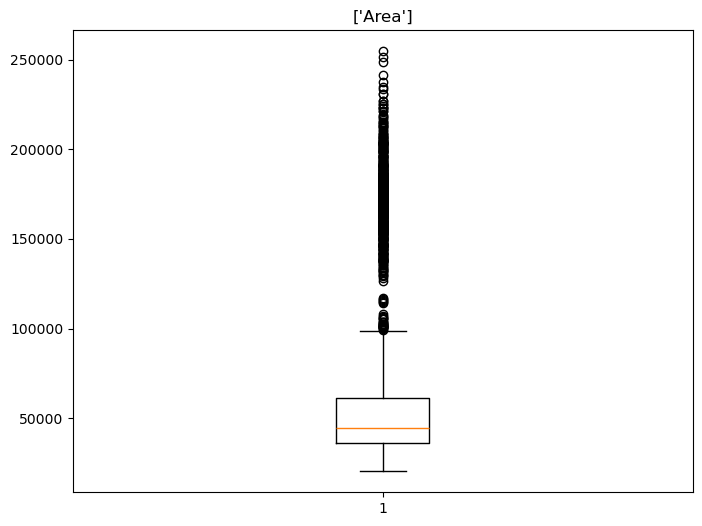

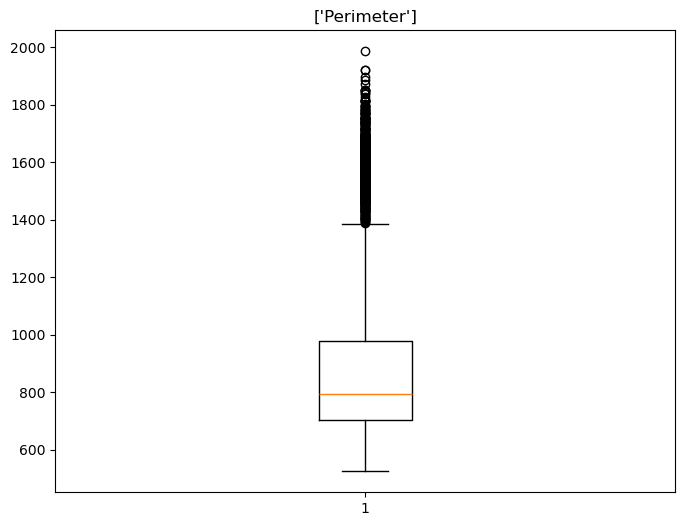

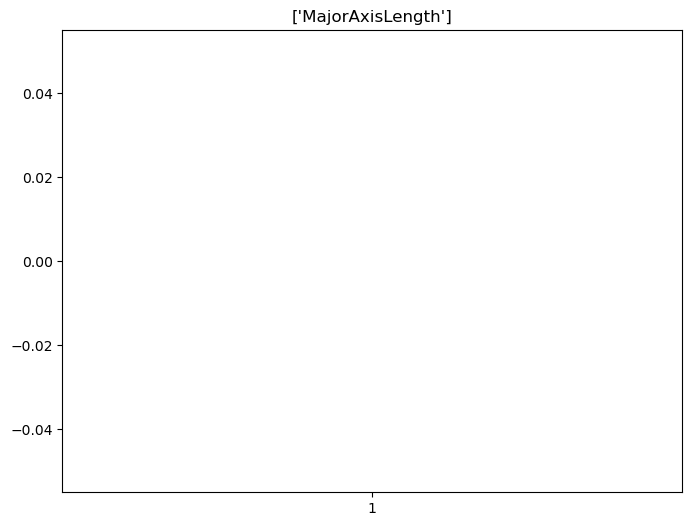

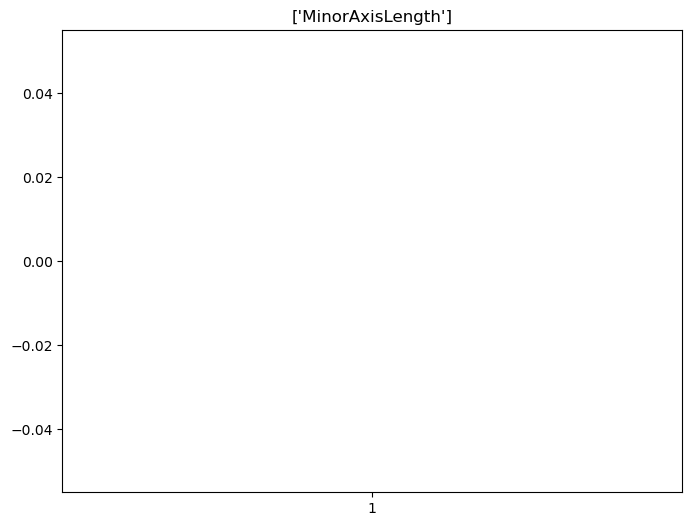

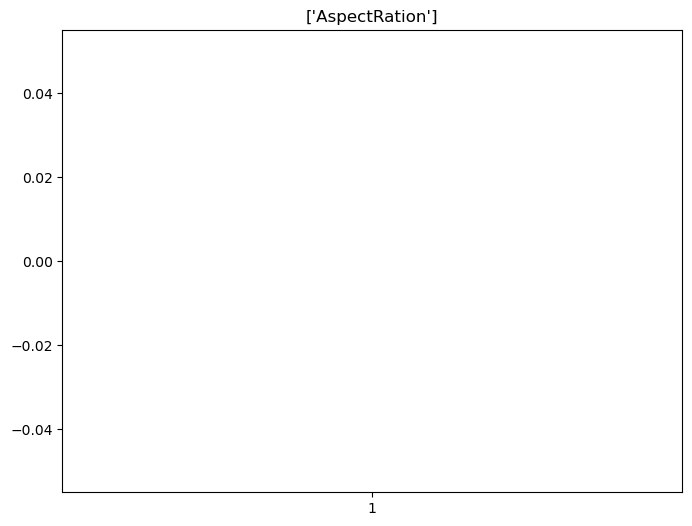

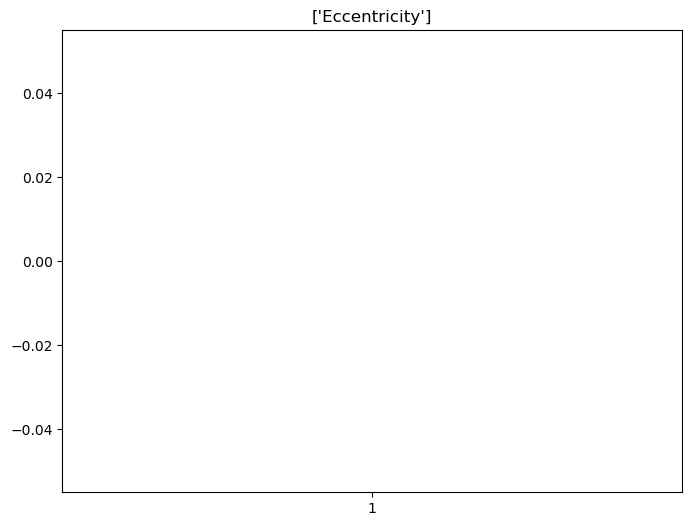

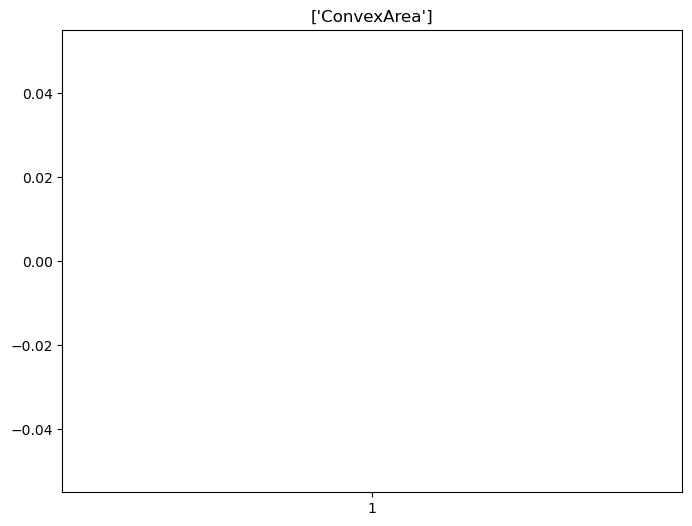

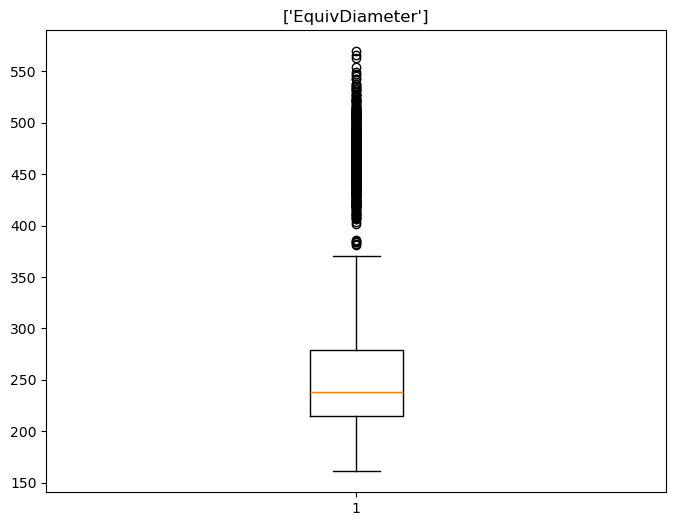

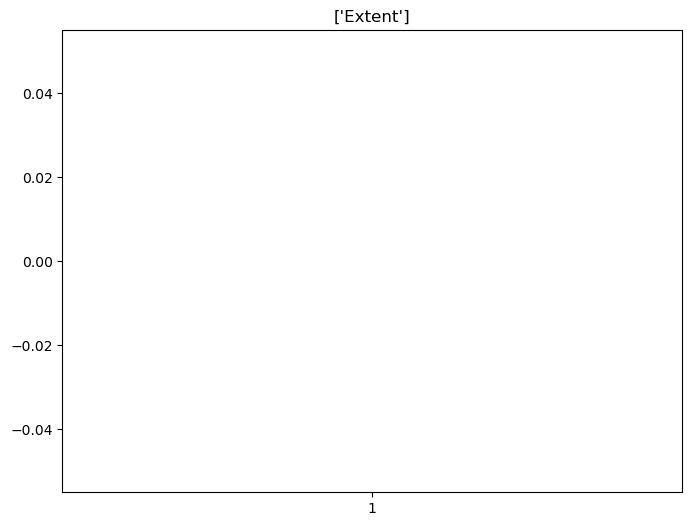

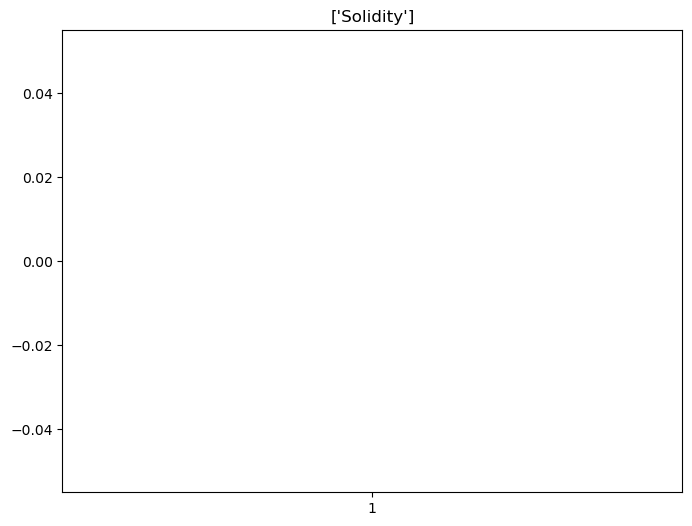

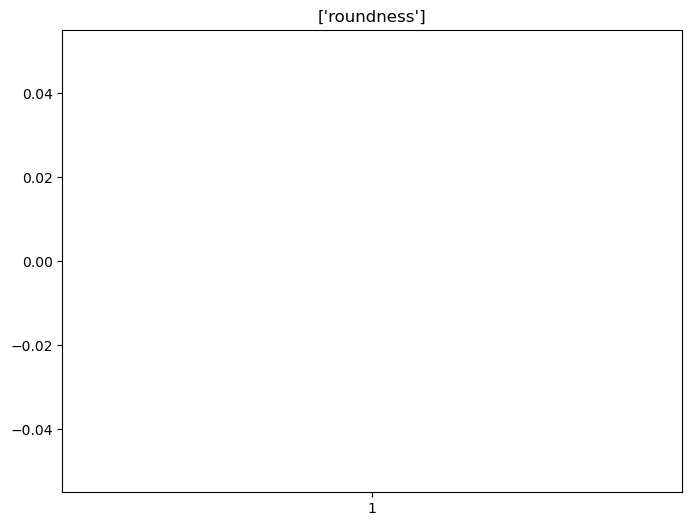

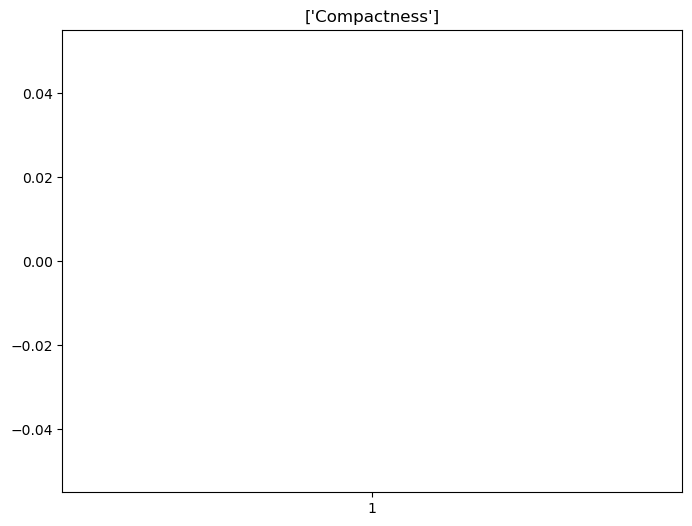

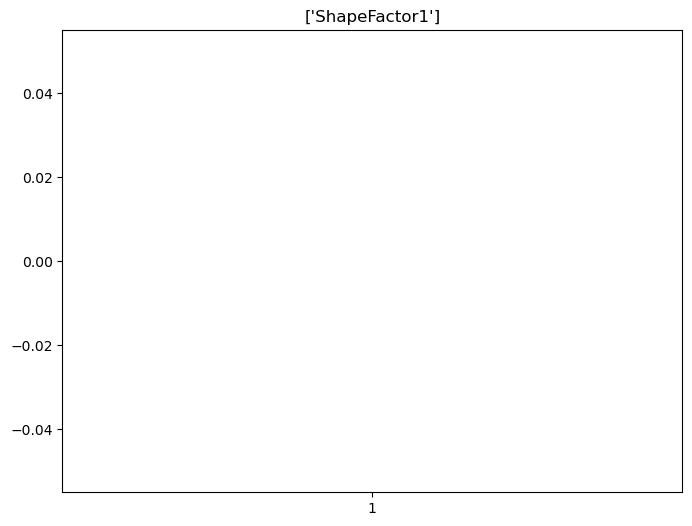

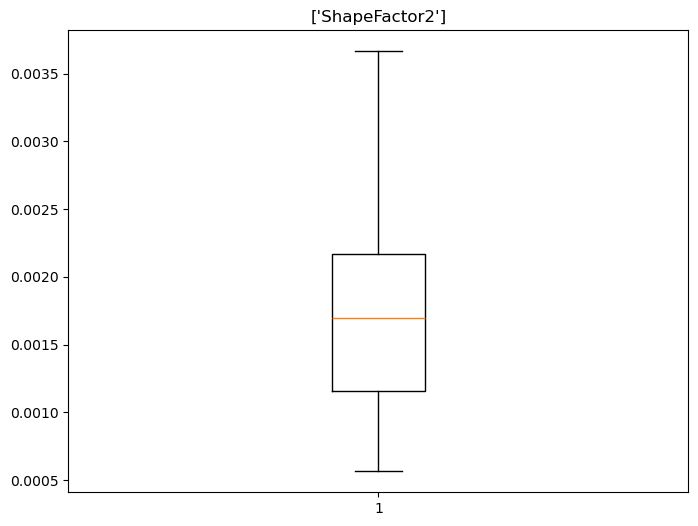

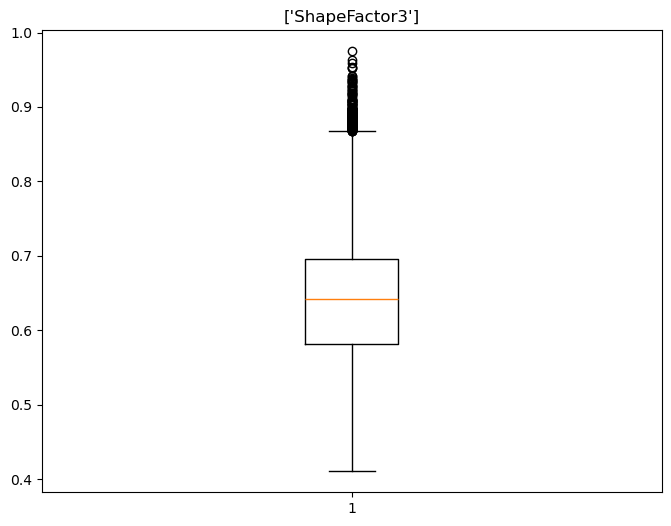

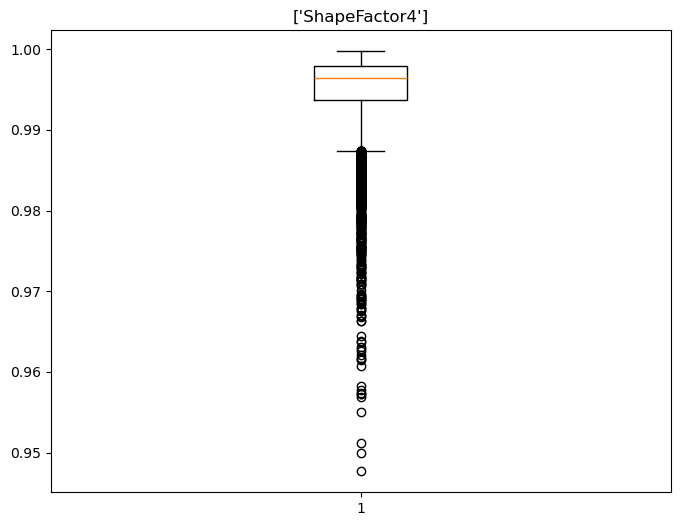

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

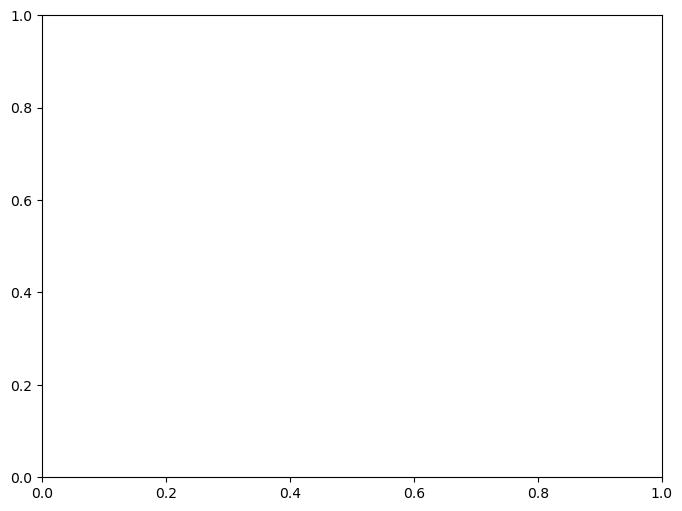

In [104]:
#Checking the outlier through boxplot visualisation
for columns in data.columns:
    plt.figure(figsize=(8,6))
    plt.boxplot(data[columns])
    plt.title([columns])
    plt.show()

In [122]:
#calculate IQR and identify outliers
outliers_dict = {}
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_dict[column] = (data[column] < lower_bound) | (data[column] > upper_bound)
    

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [126]:
#splitting the data
x= data.drop(['Class'],axis=1)
y= data['Class']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [ ]:
#model fitting

model.fit(x_train,y_train)